In [1]:
import nltk
import pickle5 as pickle
import carmen
from pyarrow import json
import jsonlines
import json_lines
import spacy
import tokenizer
from json2parquet import convert_json
import csv
import ijson
from nltk.tokenize import word_tokenize
import gensim

from functools import partial

import os
import pyarrow.parquet as pq

In [2]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
# %matplotlib inline"

In [3]:
from gensim.models import CoherenceModel
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
nltk.download('punkt')

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import gensim
from gensim import corpora
from pprint import pprint
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import datetime
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import webcolors
import folium
plt.rcParams.update({'figure.figsize': (30, 30), 'figure.dpi': 120})

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations
        
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

def carmenFormat(tweet_id, text):
    tweetFormatList = []
    carmenTweet = {"tweet": {"text": text, "id": tweet_id}}
    #print(carmenTweet)
    return carmenTweet

        #for tweets in row['text'][index]:
        #tweetFormatList.append({"tweet": {"id": row[],"text": tweet}})
    #for index, row in df.iterrows():

    #return tweetFormatList

def twitterLocation(list):
    tweetList = []
    for tweet in list:
        #print("tweeeet", tweet)
        tweetLocation = resolver.resolve_tweet(tweet)
        tweetList.append(tweetLocation)
    return tweetList
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

def corpusStemmed(x):
    corpus = []
    for tweets in x['stemmed']:
        corpus.append(x['id2word_stemmed'].doc2bow(tweets))
    
    return corpus

def createLDAModel(x):
    mallet_path = '/Users/austingerner/mallet/bin/mallet' # update this path
    ldaMalletModel = gensim.models.wrappers.LdaMallet(mallet_path, corpus=x['hashtag_text'], num_topics=5, id2word=x['hashtags'])

    #for tweets in range(len(x)):
     #print("x", x['corpus_stemmed'][tweets], tweets, x['hashtags'][tweets])
      #ldaMalletModel = gensim.models.wrappers.LdaMallet(mallet_path, corpus=x['corpus_stemmed'][tweets], num_topics=5, id2word=x['id2word_stemmed'][tweets])
       # ldaMalletModel.save("{}-{}.txt".format(tweets, x['hashtags'][tweets]))
    return ldaMalletModel


def lemmatiziation(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent))
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     print("tweets_out", tweets_out)
    return tweets_out

def applyLemminzation(x):
#     print("x", x)
    tweet_list = pd.Series(lemmatiziation(x, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))
    print("tweet_list", tweet_list)

    return tweet_list

def applyStemmer(x):
    for tweets in x:
#         print(tweets, "tweets")
        for tweet in tweets:
            stemmer.stem(tweet)
    print("Stemmed", x, tweets)
    return x
def stemmerCorporaDictionary(x):
    corpora.Dictionary(x)

    print("corporadict", x)
    return x
        #[stemmer.stem(y) for y in x]


# Geolocation

In [9]:
tweets_distribution_sentiment_geolocation_df = pd.read_pickle("/Users/austingerner/Documents/gw/capstone/modeling/lda/data/tweet_topic_distribution_location.pkl")

In [10]:
tweets_distribution_sentiment_geolocation_df.head()

city        country              county  \
0  Norwalk   United States  Fairfield County     
1  New York  United States  New York County      
3  Atlanta   United States  Fulton County        
4  Manteca   United States  San Joaquin County   
9  New York  United States  New York County      

                       created_at                   id lang   latitude  \
0  Tue Apr 21 12:11:01 +0000 2020  1252570534250008577  en   41.113660   
1  Tue Sep 08 19:25:02 +0000 2020  1303414058255675392  en   40.773041   
3  Thu Apr 09 10:00:00 +0000 2020  1248188906148892673  en   33.747421   
4  Sun Jul 12 03:07:22 +0000 2020  1282149524442472448  en   37.799170   
9  Tue Sep 22 13:36:22 +0000 2020  1308399742993473538  en   40.773041   

    longitude  \
0 -73.407654    
1 -73.957489    
3 -84.412048    
4 -121.232189   
9 -73.957489    

                                                                               no_stop_joined  \
0  gasb proposal postpones almost statement implementation guide effective dates fiscal years   
1  lead global procurement supply covid vaccines covax world health organization                
3  looking important information ease capacity constraints deal patient flow issues             
4  quarantine watch shows normally watch closeenoughmax sip streaming covid                     
9  fauci direct listen experts politicians might survive pandemic infected                      

         state  \
0  Connecticut   
1  New York      
3  Georgia       
4  California    
9  New York      

                                                                                                                                             text_x  \
0  #GASB's proposal postpones almost all Statement and Implementation Guide effective dates for fiscal years 2019 and… https://t.co/ohIGhlOpAz        
1  @UNICEF will lead global procurement &amp; supply of #COVID19 vaccines for #COVAX, the World Health Organization (@WHO)… https://t.co/1gzepELKrK   
3  Are you looking for important information on how to ease capacity constraints and deal with patient flow issues fro… https://t.co/9L03iHK8sN       
4  Why is #quarantine having me watch shows I normally wouldn’t watch? \n#CloseEnoughMAX #sip2020 #streaming #COVID19                                 
9  From Dr. Fauci direct\nListen to experts not politicians and you might survive a pandemic\n\n40+% get infected from as… https://t.co/uPLZCCzCWX    

                                                                                    tidy_tweet  \
0  #gasb proposal postpones almost statement implementation guide effective dates fiscal years   
1  will lead global procurement supply #covid vaccines #covax world health organization          
3  looking important information ease capacity constraints deal with patient flow issues         
4  #quarantine having watch shows normally wouldn watch #closeenoughmax #sip #streaming #covid   
9  from fauci direct listen experts politicians might survive pandemic infected from             

                                                                                        tidy_tweet_tokens  \
0  [gasb, proposal, postpones, almost, statement, implementation, guide, effective, dates, fiscal, years]   
1  [will, lead, global, procurement, supply, covid, vaccines, covax, world, health, organization]           
3  [looking, important, information, ease, capacity, constraints, deal, with, patient, flow, issues]        
4  [quarantine, having, watch, shows, normally, wouldn, watch, closeenoughmax, sip, streaming, covid]       
9  [from, fauci, direct, listen, experts, politicians, might, survive, pandemic, infected, from]            

                                                                                           tokens_no_stop  \
0  [gasb, proposal, postpones, almost, statement, implementation, guide, effective, dates, fiscal, years]   
1  [lead, global, procurement, supply, covid, vaccines, covax, world, health, organization]      

In [11]:
# covid_hashtags_full_preprocessed_df = pd.read_pickle('./062020_covid_hashtags_topic_model.pkl')
covid_hashtags_full_preprocessed_geolocation_df = tweets_distribution_sentiment_geolocation_df.copy()
covid_hashtags_full_preprocessed_geolocation_df = covid_hashtags_full_preprocessed_geolocation_df.drop(columns = ['created_at', 'text_x', 'tidy_tweet', 'tokens_no_stop', 'stemmed', 'tidy_tweet_tokens', 'hashtags', 'new_tweets_corpus', 'max_count', 'total_docs', 'no_stop_joined'])


In [12]:
# covid_hashtags_full_preprocessed_geolocation_df.to_pickle("covid_topic_geolocation_df.pkl")
# tm_tweets_geolocation_raw_df = pd.read_pickle("covid_topic_geolocation_df.pkl")


In [14]:
covid_hashtags_full_preprocessed_geolocation_df.head()

city        country              county                   id lang  \
0  Norwalk   United States  Fairfield County    1252570534250008577  en    
1  New York  United States  New York County     1303414058255675392  en    
3  Atlanta   United States  Fulton County       1248188906148892673  en    
4  Manteca   United States  San Joaquin County  1282149524442472448  en    
9  New York  United States  New York County     1308399742993473538  en    

    latitude   longitude        state  created_at_month  topic_id  prevalence  
0  41.113660 -73.407654   Connecticut  4                 33        0.015782    
1  40.773041 -73.957489   New York     9                 11        0.010290    
3  33.747421 -84.412048   Georgia      4                 65        0.019514    
4  37.799170 -121.232189  California   7                 0         0.010181    
9  40.773041 -73.957489   New York     9                 60        0.014944

In [15]:
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('United States', "United States of America")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Tanzania', "United Republic of Tanzania")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Democratic Republic of Congo', "Democratic Republic of the Congo")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Congo', "Republic of the Congo")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Lao', "Laos")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Syrian Arab Republic', "Syria")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Serbia', "Republic of Serbia")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Czechia', "Czech Republic")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('UAE', "United Arab Emirates")


In [16]:
# indexNames = covid_hashtags_sample_preprocessed_geolocation[ (covid_hashtags_sample_preprocessed_geolocation['latitude'] == np.nan) & (covid_hashtags_sample_preprocessed_geolocation['longitude'] == np.nan) ].index
# covid_hashtags_sample_preprocessed_geolocation.drop(indexNames , inplace=True)

tweets_distribution_sentiment_geolocation_df.latitude = tweets_distribution_sentiment_geolocation_df.latitude.replace('', np.nan)
tweets_distribution_sentiment_geolocation_df.longitude = tweets_distribution_sentiment_geolocation_df.longitude.replace('', np.nan)


In [17]:
# indexNames = covid_hashtags_sample_preprocessed_geolocation[ (covid_hashtags_sample_preprocessed_geolocation['latitude'] == np.nan) & (covid_hashtags_sample_preprocessed_geolocation['longitude'] == np.nan) ].index
# covid_hashtags_sample_preprocessed_geolocation.drop(indexNames , inplace=True)

tweets_distribution_sentiment_geolocation_df = tweets_distribution_sentiment_geolocation_df[tweets_distribution_sentiment_geolocation_df['latitude'].notna()]
tweets_distribution_sentiment_geolocation_df = tweets_distribution_sentiment_geolocation_df[tweets_distribution_sentiment_geolocation_df['longitude'].notna()]


In [13]:
# covid_hashtags_sample_preprocessed_geolocation_united_states = covid_hashtags_sample_preprocessed_geolocation.loc[covid_hashtags_sample_preprocessed_geolocation.country == "United States"]
# covid_hashtags_sample_preprocessed_geolocation_united_states.to_pickle('./covid_hashtags_sample_preprocessed_geolocation_united_states.pkl')



In [18]:
covid_hashtags_full_preprocessed_geolocation_clean_df = tweets_distribution_sentiment_geolocation_df.copy()
covid_hashtags_full_preprocessed_geolocation_clean_df = covid_hashtags_full_preprocessed_geolocation_clean_df.reset_index()
covid_hashtags_full_preprocessed_geolocation_clean_df = covid_hashtags_full_preprocessed_geolocation_clean_df.drop(columns=['index'])

In [19]:
covid_hashtags_full_preprocessed_geolocation_clean_df = covid_hashtags_full_preprocessed_geolocation_clean_df.replace(r'^\s*$', np.nan, regex=True)

In [20]:
covid_hashtags_full_preprocessed_geolocation_clean_df['state'].isnull().sum()

0

In [42]:
covid_hashtags_full_preprocessed_geolocation_clean_df.head()

id  \
0  1260119310913200129   
1  1260629898210803712   
2  1257602651228905473   
3  1260110181410758657   
4  1261998410766233600   

                                                                                        tidy_tweet  \
0  with record more deaths reported #covid death toll #delhi mounted tuesday morning                 
1  only #redwave happening counting dead americans trump incompetence                                
2  possible second wave coronavirus tune savannah city leaders prepping                              
3  bhubaneswar municipal corporation #bmc seals bapuji nagar market violation covid guidelines       
4  core pubmed clinical characteristics neonates born mothers with covid related articles clinical   

                                                                                           tokens_no_stop  \
0  [record, deaths, reported, covid, death, toll, delhi, mounted, tuesday, morning]                         
1  [redwave, happening, counting, dead, americans, trump, incompetence]                                     
2  [possible, second, wave, coronavirus, tune, savannah, city, leaders, prepping]                           
3  [bhubaneswar, municipal, corporation, bmc, seals, bapuji, nagar, market, violation, covid, guidelines]   
4  [core, pubmed, clinical, characteristics, neonates, born, mothers, covid, related, articles, clinical]   

   topic_75_x  negative  neutral  positive  compound  sentiment  \
0  69          0.262     0.738    0.0      -0.5994   -1           
1  36          0.559     0.441    0.0      -0.8225   -1           
2  32          0.000     1.000    0.0       0.0000    0           
3  17          0.242     0.758    0.0      -0.4939   -1           
4  23          0.000     1.000    0.0       0.0000    0           

                                                    lemmatized      city  \
0  [record, death, report, covid, death, toll, mount, morning]  Delhi      
1  [redwave, happen, count, dead, trump, incompetence]          NaN        
2  [possible, second, wave, leader, preppe]                     Savannah   
3  [violation, covid, guideline]                                NaN        
4  [neonate, bear, mother, covid, related, article, clinical]   Belfast    

                    country          county lang   latitude  longitude  \
0  India                     Rewa            en   24.733800  81.334630   
1  Italy                     NaN             en   41.292540  12.573465   
2  United States of America  Chatham County  en   32.080780 -81.090719   
3  India                     NaN             en   21.504394  82.717670   
4  United Kingdom            County Antrim   en   54.595295 -5.934524    

              state  
0  Madhya Pradesh    
1  NaN               
2  Georgia           
3  NaN               
4  Northern Ireland

In [33]:
covid_hashtags_full_preprocessed_geolocation_clean_df.state[1]

nan

In [ ]:
# from geopy.geocoders import Nominatim
# from functools import partial

# reverse = partial(geolocator.reverse, language="es")
# # print(reverse("{}, {}".format("41.292540","12.573465")))

# geolocator = Nominatim(user_agent="agerner17@gwu.edu")

# def get_zipcode(df, geolocator, lat_field, lon_field):
# #     print("getZipcode")
#     try:
#         reverse = partial(geolocator.reverse, language="es")
# #         print("reverse", reverse, df[lat_field], df[lon_field])

#         location = reverse("{}, {}".format(df[lat_field], df[lon_field]))
# #         print("location", location)
#         return location
#     except:
#         return np.nan
    
# covid_hashtags_full_preprocessed_geolocation_df['location_raw'] = covid_hashtags_full_preprocessed_geolocation_df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')

# covid_hashtags_full_preprocessed_geolocation_df.to_pickle('./covid_hashtags_geolocation_may_032321.pkl')



In [13]:
# tm_gelocation_analysis_state.to_pickle('./tm_gelocation_analysis_state_may_032321.pkl')

covid_hashtags_full_preprocessed_geolocation_clean_df.to_pickle("covid_tweet_location_analysis_sentiment_analysis_august_0426.pkl")
# tweets_topic_distribution_sentiment_df.to_pickle('sentiment_analysis_vader_results_may_2020.pkl')


NameError: name 'covid_hashtags_full_preprocessed_geolocation_clean_df' is not defined

In [55]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

us_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
us_states_shapes = f'{us_url}/us-states.json'


In [21]:
covid_hashtags_full_preprocessed_geolocation_clean_df.head()

city                   country              county  \
0  Norwalk   United States of America  Fairfield County     
1  New York  United States of America  New York County      
2  Atlanta   United States of America  Fulton County        
3  Manteca   United States of America  San Joaquin County   
4  New York  United States of America  New York County      

                       created_at                   id lang   latitude  \
0  Tue Apr 21 12:11:01 +0000 2020  1252570534250008577  en   41.113660   
1  Tue Sep 08 19:25:02 +0000 2020  1303414058255675392  en   40.773041   
2  Thu Apr 09 10:00:00 +0000 2020  1248188906148892673  en   33.747421   
3  Sun Jul 12 03:07:22 +0000 2020  1282149524442472448  en   37.799170   
4  Tue Sep 22 13:36:22 +0000 2020  1308399742993473538  en   40.773041   

    longitude  \
0 -73.407654    
1 -73.957489    
2 -84.412048    
3 -121.232189   
4 -73.957489    

                                                                               no_stop_joined  \
0  gasb proposal postpones almost statement implementation guide effective dates fiscal years   
1  lead global procurement supply covid vaccines covax world health organization                
2  looking important information ease capacity constraints deal patient flow issues             
3  quarantine watch shows normally watch closeenoughmax sip streaming covid                     
4  fauci direct listen experts politicians might survive pandemic infected                      

         state  \
0  Connecticut   
1  New York      
2  Georgia       
3  California    
4  New York      

                                                                                                                                             text_x  \
0  #GASB's proposal postpones almost all Statement and Implementation Guide effective dates for fiscal years 2019 and… https://t.co/ohIGhlOpAz        
1  @UNICEF will lead global procurement &amp; supply of #COVID19 vaccines for #COVAX, the World Health Organization (@WHO)… https://t.co/1gzepELKrK   
2  Are you looking for important information on how to ease capacity constraints and deal with patient flow issues fro… https://t.co/9L03iHK8sN       
3  Why is #quarantine having me watch shows I normally wouldn’t watch? \n#CloseEnoughMAX #sip2020 #streaming #COVID19                                 
4  From Dr. Fauci direct\nListen to experts not politicians and you might survive a pandemic\n\n40+% get infected from as… https://t.co/uPLZCCzCWX    

                                                                                    tidy_tweet  \
0  #gasb proposal postpones almost statement implementation guide effective dates fiscal years   
1  will lead global procurement supply #covid vaccines #covax world health organization          
2  looking important information ease capacity constraints deal with patient flow issues         
3  #quarantine having watch shows normally wouldn watch #closeenoughmax #sip #streaming #covid   
4  from fauci direct listen experts politicians might survive pandemic infected from             

                                                                                        tidy_tweet_tokens  \
0  [gasb, proposal, postpones, almost, statement, implementation, guide, effective, dates, fiscal, years]   
1  [will, lead, global, procurement, supply, covid, vaccines, covax, world, health, organization]           
2  [looking, important, information, ease, capacity, constraints, deal, with, patient, flow, issues]        
3  [quarantine, having, watch, shows, normally, wouldn, watch, closeenoughmax, sip, streaming, covid]       
4  [from, fauci, direct, listen, experts, politicians, might, survive, pandemic, infected, from]            

                                                                                           tokens_no_stop  \
0  [gasb, proposal, postpones, almost, statement, implementation, guide, effective, dates, fiscal, years]   
1  [lead, global, procurement, 

# Build Visualization Tables

In [22]:
tm_geolocation_analysis_state_count_by_topic_df = covid_hashtags_full_preprocessed_geolocation_clean_df.copy()
tm_geolocation_analysis_country_count_by_topic_df = covid_hashtags_full_preprocessed_geolocation_clean_df.copy()


In [47]:
# tm_geolocation_analysis_country_count_by_topic_df = covid_hashtags_full_preprocessed_geolocation_clean_df.copy()

## US States Data Scrubbing

In [23]:
tm_geolocation_analysis_state_count_by_topic_df = tm_geolocation_analysis_state_count_by_topic_df.dropna(subset=['state'])



In [24]:
tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_count_by_topic_df.loc[tm_geolocation_analysis_state_count_by_topic_df.country == 'United States of America']


In [25]:
# tm_geolocation_analysis_state_us_count_by_topic_df.head(50)

In [26]:
tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.groupby(['state', 'topic_id', 'sentiment']).count()['longitude']


KeyError: 'state'

In [60]:
tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.reset_index()
# tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.drop(columns='index')




In [61]:
# dict = {'country': 'Country',
#         'state': 'State',
#         'topic_75_x': 'Topic',
#         'sentiment': 'Sentiment',
#         'longitude': 'Count'}

dict = {'state': 'State',
        'topic_75_x': 'Topic',
        'sentiment': 'Sentiment',
        'longitude': 'Count'}
tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.rename(columns = dict)


In [65]:
tm_geolocation_analysis_state_us_count_by_topic_df.to_pickle("tm_geolocation_analysis_state_us_count_by_topic_sentiment_analysis_august_0426.pkl")



## Dominant Topics - US States

In [73]:
dominant_topic_us_1 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 39]
# tm_geolocation_analysis_state_us_count_by_topic_df
dominant_topic_us_1.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count
2009  Florida        39     0          809  
950   California     39     0          735  
6841  New York       39     0          288  
9141  Texas          39     0          280  
949   California     39    -1          196  
9140  Texas          39    -1          169  
7394  Ohio           39     0          162  
4611  Massachusetts  39     0          148  
951   California     39     1          132  
4387  Maryland       39     0          127

In [61]:
# tm_geolocation_analysis_state_us_count_by_topic_df['Perc%'] = 100 * tm_geolocation_analysis_state_us_count_by_topic_df['Count']/ tm_geolocation_analysis_state_us_count_by_topic_df['Count'].sum()


In [62]:
# tm_geolocation_analysis_state_us_count_by_topic_df.sort_values(by=['Count'], ascending=False).head(10)

In [75]:
dominant_topic_us_1 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 39]

dominant_topic_us_1['Perc%'] = 100 * dominant_topic_us_1['Count']/ dominant_topic_us_1['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 39'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_1,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-75-ab78684fe5c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_1['Perc%'] = 100 * dominant_topic_us_1['Count']/ dominant_topic_us_1['Count'].sum()


In [76]:
dominant_topic_us_1.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count      Perc%
2009  Florida        39     0          809    11.379941
950   California     39     0          735    10.339007
6841  New York       39     0          288    4.051203 
9141  Texas          39     0          280    3.938669 
949   California     39    -1          196    2.757069 
9140  Texas          39    -1          169    2.377268 
7394  Ohio           39     0          162    2.278802 
4611  Massachusetts  39     0          148    2.081868 
951   California     39     1          132    1.856801 
4387  Maryland       39     0          127    1.786468

In [82]:
# dominant_topic_us_1.count(axis='Sentiment')
sentiment_dist_1= tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 39].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_1 = sentiment_dist_1.set_index('Sentiment')


In [84]:
sentiment_dist_1['Perc%'] = 100 * sentiment_dist_1['Count']/ sentiment_dist_1['Count'].sum()


In [85]:
sentiment_dist_1.head()

Topic  Count      Perc%
Sentiment                         
-1         1989   1110   15.614010
 0         2028   4542   63.890843
 1         1872   1457   20.495147

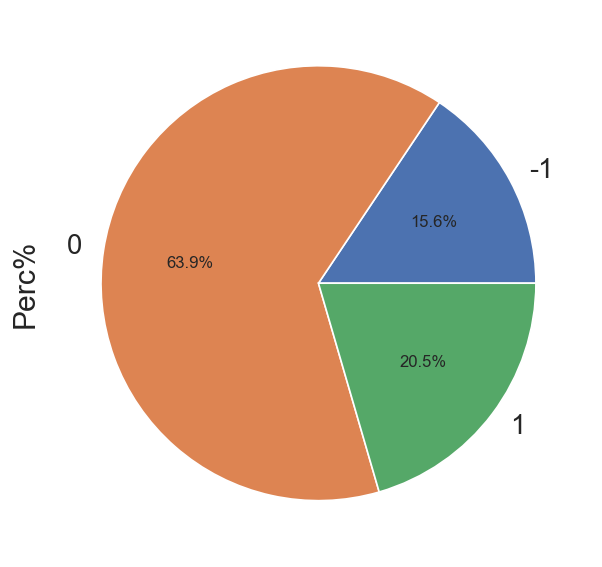

In [86]:

plot = sentiment_dist_1.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [88]:

# # Draw Plot
# # fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

# data = [sentiment_dist_1.Count[1], sentiment_dist_1.Count[1], sentiment_dist_1.Count[2]]
# categories = ['Negative', 'Neutral', 'Positive']
# explode = [0.05,0.05,0.05]

# def func(pct, allvals):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}% ({:d} )".format(pct, absolute)

# wedges, texts, autotexts = ax.pie(data, 
#                                   autopct=lambda pct: func(pct, data),
#                                   textprops=dict(color="w"), 
#                                   colors=['#e55039', '#3c6382', '#78e08f'],
#                                   startangle=140,
#                                   explode=explode)

# # Decoration
# ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
# plt.setp(autotexts, size=10, weight=700)
# ax.set_title("Number of Tweets by Sentiment", fontsize=12, fontweight="bold")
# plt.show()

In [89]:
dominant_topic_us_2 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 74]

dominant_topic_us_2['Perc%'] = 100 * dominant_topic_us_2['Count']/ dominant_topic_us_2['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 74'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_2,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-89-49c97051305f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_2['Perc%'] = 100 * dominant_topic_us_2['Count']/ dominant_topic_us_2['Count'].sum()


In [90]:
dominant_topic_us_2.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1055  California            74     0          990    5.917160
1056  California            74     1          933    5.576475
6947  New York              74     1          631    3.771442
6946  New York              74     0          616    3.681788
9246  Texas                 74     0          547    3.269380
1054  California            74    -1          429    2.564103
1890  District of Columbia  74     1          421    2.516287
9247  Texas                 74     1          418    2.498356
2114  Florida               74     0          409    2.444564
2115  Florida               74     1          394    2.354910

In [92]:
sentiment_dist_2= tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 74].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_2 = sentiment_dist_2.set_index('Sentiment')


In [93]:
sentiment_dist_2.head()

Topic  Count
Sentiment              
-1         3848   3340 
 0         3922   6887 
 1         3922   6504

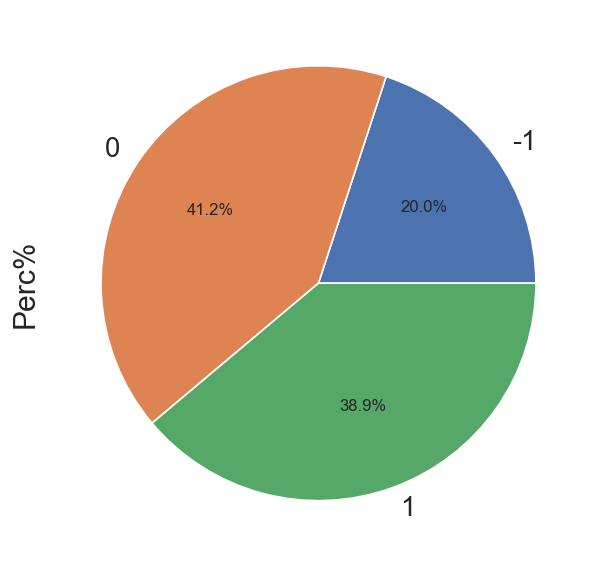

In [94]:
sentiment_dist_2['Perc%'] = 100 * sentiment_dist_2['Count']/ sentiment_dist_2['Count'].sum()

plot = sentiment_dist_2.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [95]:
dominant_topic_us_3 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 68]

dominant_topic_us_3['Perc%'] = 100 * dominant_topic_us_3['Count']/ dominant_topic_us_3['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 68'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_3,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-95-d9441a784cc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_3['Perc%'] = 100 * dominant_topic_us_3['Count']/ dominant_topic_us_3['Count'].sum()


In [96]:
dominant_topic_us_3.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
6929  New York        68     1          335    6.229081
1038  California      68     1          329    6.117516
2097  Florida         68     1          299    5.559688
9229  Texas           68     1          218    4.053552
1037  California      68     0          186    3.458535
7152  North Carolina  68     1          161    2.993678
2096  Florida         68     0          139    2.584604
6521  New Jersey      68     1          130    2.417255
8142  Pennsylvania    68     1          126    2.342878
7482  Ohio            68     1          124    2.305690

In [97]:
sentiment_dist_3 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 68].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_3 = sentiment_dist_3.set_index('Sentiment')


In [98]:
sentiment_dist_3['Perc%'] = 100 * sentiment_dist_3['Count']/ sentiment_dist_3['Count'].sum()

sentiment_dist_3.head()

Topic  Count      Perc%
Sentiment                         
-1         3196   564    10.487170
 0         3400   1354   25.176646
 1         3604   3460   64.336184

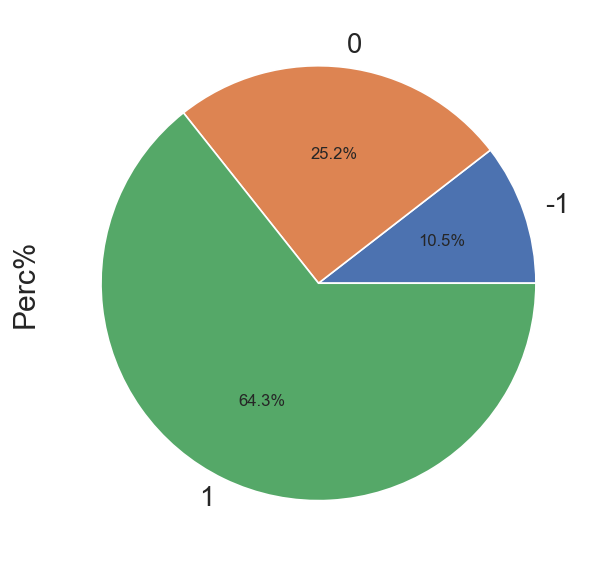

In [99]:

plot = sentiment_dist_3.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [100]:
dominant_topic_us_4 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 18]

dominant_topic_us_4['Perc%'] = 100 * dominant_topic_us_4['Count']/ dominant_topic_us_4['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 18'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_4,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-100-8c863dddc044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_4['Perc%'] = 100 * dominant_topic_us_4['Count']/ dominant_topic_us_4['Count'].sum()


In [101]:
dominant_topic_us_4.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
887   California            18     0          788    6.354326
6779  New York              18     1          780    6.289815
6778  New York              18     0          778    6.273688
888   California            18     1          693    5.588259
1721  District of Columbia  18     0          553    4.459318
1722  District of Columbia  18     1          429    3.459398
886   California            18    -1          321    2.588501
9078  Texas                 18     0          315    2.540118
1946  Florida               18     0          280    2.257882
9079  Texas                 18     1          271    2.185308

In [164]:
sentiment_dist_4 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 18].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_4 = sentiment_dist_4.set_index('Sentiment')



In [165]:
sentiment_dist_4['Perc%'] = 100 * sentiment_dist_4['Count']/ sentiment_dist_4['Count'].sum()

sentiment_dist_4.head()

Topic  Count      Perc%
Sentiment                         
-1         954    2017   16.264817
 0         936    5375   43.343279
 1         954    5009   40.391904

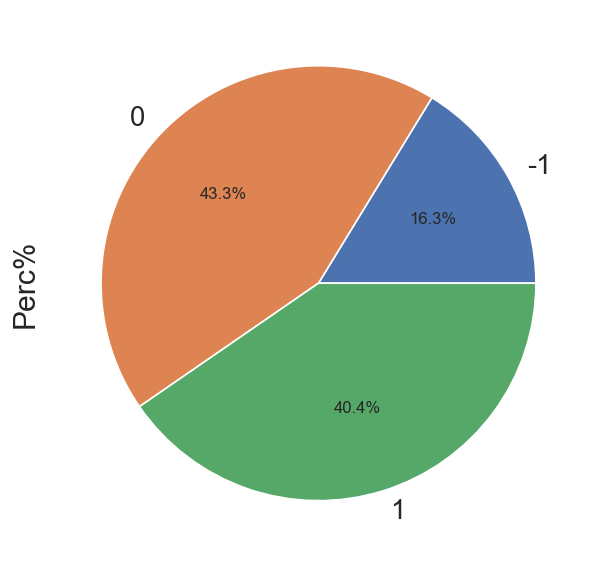

In [166]:

plot = sentiment_dist_4.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [105]:
dominant_topic_us_5 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 59]

dominant_topic_us_5['Perc%'] = 100 * dominant_topic_us_5['Count']/ dominant_topic_us_5['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 59'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_5,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-105-a1419c95348a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_5['Perc%'] = 100 * dominant_topic_us_5['Count']/ dominant_topic_us_5['Count'].sum()


In [106]:
dominant_topic_us_5.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1010  California            59     0          582    5.449948
1009  California            59    -1          512    4.794456
6901  New York              59     0          506    4.738271
6900  New York              59    -1          457    4.279427
1011  California            59     1          453    4.241970
6902  New York              59     1          357    3.343010
1844  District of Columbia  59     0          277    2.593876
1843  District of Columbia  59    -1          276    2.584512
9200  Texas                 59    -1          240    2.247401
1845  District of Columbia  59     1          215    2.013297

In [161]:
sentiment_dist_5 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 59].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_5 = sentiment_dist_5.set_index('Sentiment')

In [162]:
sentiment_dist_5['Perc%'] = 100 * sentiment_dist_5['Count']/ sentiment_dist_5['Count'].sum()

sentiment_dist_5.head()

Topic  Count      Perc%
Sentiment                         
-1         3068   3714   34.778537
 0         2950   3825   35.817960
 1         3009   3140   29.403502

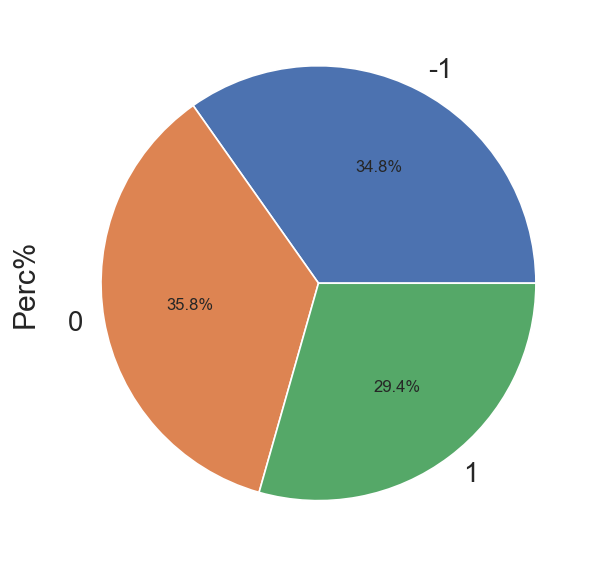

In [163]:

plot = sentiment_dist_5.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [115]:
dominant_topic_us_5.shape

(150, 5)

In [110]:
dominant_topic_us_6 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 54]

dominant_topic_us_6['Perc%'] = 100 * dominant_topic_us_6['Count']/ dominant_topic_us_6['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 54'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_6,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-110-49db477c811a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_6['Perc%'] = 100 * dominant_topic_us_6['Count']/ dominant_topic_us_6['Count'].sum()


In [111]:
dominant_topic_us_6.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
996   California    54     1          761    7.474708
995   California    54     0          603    5.922797
6887  New York      54     1          413    4.056576
6886  New York      54     0          353    3.467243
2054  Florida       54     0          346    3.398487
2055  Florida       54     1          340    3.339554
9187  Texas         54     1          320    3.143110
994   California    54    -1          297    2.917199
9186  Texas         54     0          282    2.769865
8099  Pennsylvania  54     0          203    1.993910

In [158]:
sentiment_dist_6 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 54].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_6 = sentiment_dist_6.set_index('Sentiment')



In [159]:
sentiment_dist_6['Perc%'] = 100 * sentiment_dist_6['Count']/ sentiment_dist_6['Count'].sum()

sentiment_dist_6.head()

Topic  Count      Perc%
Sentiment                         
-1         2808   1687   16.570082
 0         2808   3917   38.473627
 1         2808   4577   44.956291

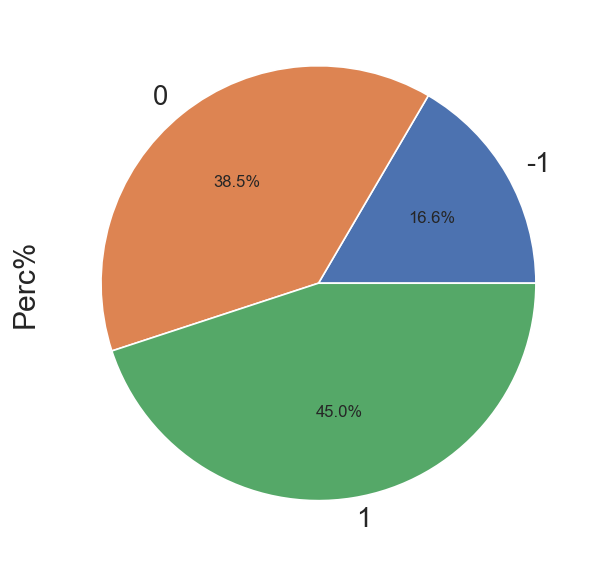

In [160]:

plot = sentiment_dist_6.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [115]:
dominant_topic_us_7 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 30]

dominant_topic_us_7['Perc%'] = 100 * dominant_topic_us_7['Count']/ dominant_topic_us_7['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 30'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_7,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-115-2acd4e6643d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_7['Perc%'] = 100 * dominant_topic_us_7['Count']/ dominant_topic_us_7['Count'].sum()


In [116]:
dominant_topic_us_7.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
924   California            30     1          698    7.828623
923   California            30     0          568    6.370570
6815  New York              30     1          512    5.742485
9115  Texas                 30     1          348    3.903096
1983  Florida               30     1          337    3.779722
6814  New York              30     0          288    3.230148
6406  New Jersey            30     0          280    3.140422
1757  District of Columbia  30     0          245    2.747869
1758  District of Columbia  30     1          241    2.703006
1982  Florida               30     0          226    2.534769

In [155]:
sentiment_dist_7 =tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 30].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_7 = sentiment_dist_7.set_index('Sentiment')

In [156]:
sentiment_dist_7['Perc%'] = 100 * sentiment_dist_7['Count']/ sentiment_dist_7['Count'].sum()

sentiment_dist_7.head()

Topic  Count      Perc%
Sentiment                         
-1         1140   422    4.733064 
 0         1530   3570   40.040377
 1         1590   4924   55.226559

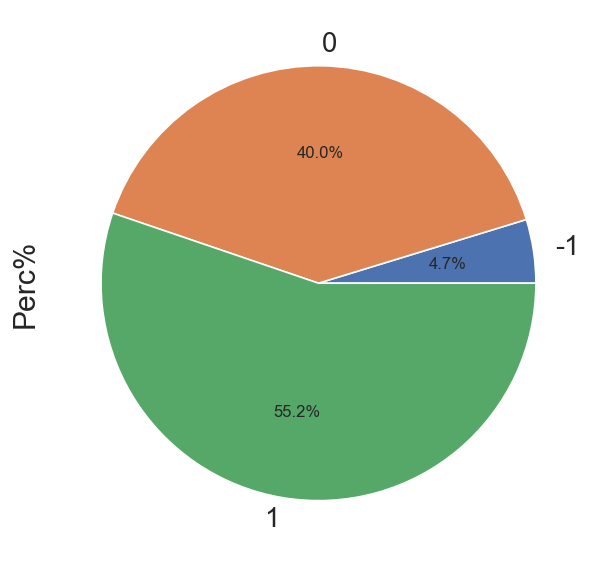

In [157]:

plot = sentiment_dist_7.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [120]:
dominant_topic_us_8 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 8]

dominant_topic_us_8['Perc%'] = 100 * dominant_topic_us_8['Count']/ dominant_topic_us_8['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 8'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_8,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-120-d77b8e3dec19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_8['Perc%'] = 100 * dominant_topic_us_8['Count']/ dominant_topic_us_8['Count'].sum()


In [78]:
dominant_topic_us_8.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1011  California            45     1          1597   8.494681
7232  New York              45     1          1532   8.148936
9764  Texas                 45     1          811    4.313830
2121  Florida               45     1          682    3.627660
1896  District of Columbia  45     1          681    3.622340
1010  California            45     0          628    3.340426
7231  New York              45     0          617    3.281915
3042  Illinois              45     1          497    2.643617
4826  Massachusetts         45     1          494    2.627660
2346  Georgia               45     1          472    2.510638

In [152]:
sentiment_dist_8 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 8].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_8 = sentiment_dist_8.set_index('Sentiment')



In [153]:
sentiment_dist_8['Perc%'] = 100 * sentiment_dist_8['Count']/ sentiment_dist_8['Count'].sum()

sentiment_dist_8.head()


Topic  Count      Perc%
Sentiment                         
-1         400    1613   14.910335
 0         416    5473   50.591607
 1         408    3732   34.498059

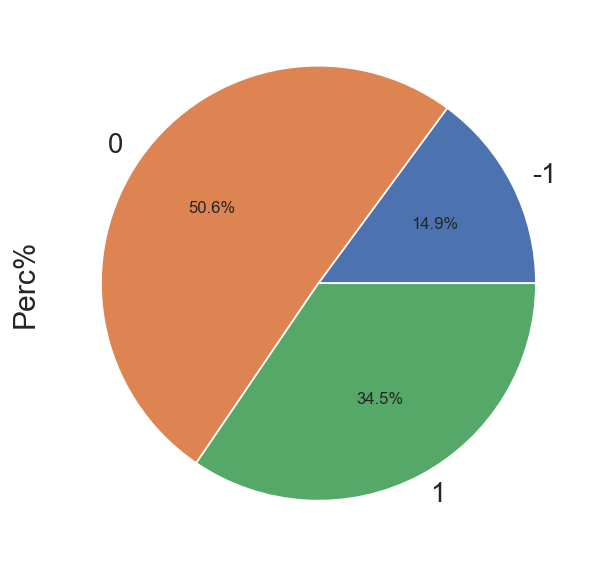

In [154]:

plot = sentiment_dist_8.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [124]:
dominant_topic_us_9 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 3]

dominant_topic_us_9['Perc%'] = 100 * dominant_topic_us_9['Count']/ dominant_topic_us_9['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 3'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_9,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-124-4d6d58ae9cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_9['Perc%'] = 100 * dominant_topic_us_9['Count']/ dominant_topic_us_9['Count'].sum()


In [80]:
dominant_topic_us_9.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1027  California            51    -1          1304   8.260484
7248  New York              51    -1          1172   7.424300
1912  District of Columbia  51    -1          776    4.915748
1029  California            51     1          659    4.174585
7250  New York              51     1          542    3.433422
9780  Texas                 51    -1          504    3.192702
7249  New York              51     0          473    2.996326
1028  California            51     0          455    2.882301
2137  Florida               51    -1          395    2.502217
4842  Massachusetts         51    -1          352    2.229824

In [149]:
sentiment_dist_9 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 3].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_9 = sentiment_dist_9.set_index('Sentiment')



In [150]:
sentiment_dist_9['Perc%'] = 100 * sentiment_dist_9['Count']/ sentiment_dist_9['Count'].sum()

sentiment_dist_9.head()

Topic  Count      Perc%
Sentiment                         
-1         153    2742   38.855038
 0         150    2123   30.083605
 1         147    2192   31.061358

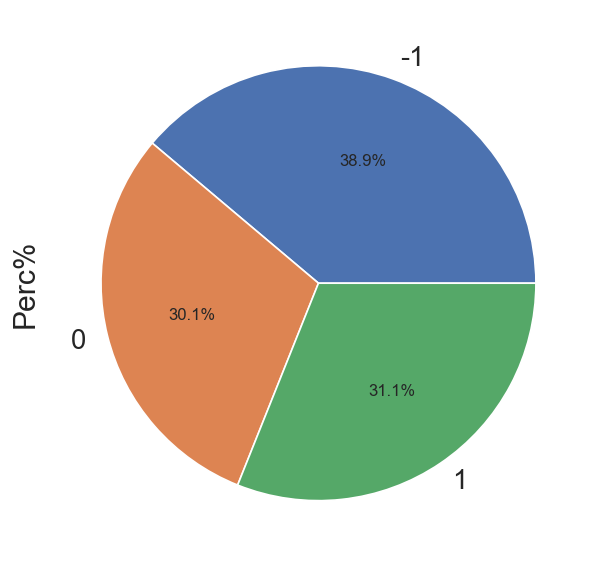

In [151]:

plot = sentiment_dist_9.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [128]:
dominant_topic_us_10 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 2]

dominant_topic_us_10['Perc%'] = 100 * dominant_topic_us_10['Count']/ dominant_topic_us_10['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 2'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_10,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-128-290007730a5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_10['Perc%'] = 100 * dominant_topic_us_10['Count']/ dominant_topic_us_10['Count'].sum()


In [129]:
dominant_topic_us_10.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
840   California            2      1          511    8.520927
6731  New York              2      1          312    5.202601
839   California            2      0          276    4.602301
9031  Texas                 2      1          234    3.901951
1899  Florida               2      1          231    3.851926
1674  District of Columbia  2      1          192    3.201601
6730  New York              2      0          186    3.101551
838   California            2     -1          182    3.034851
2778  Illinois              2      1          162    2.701351
4501  Massachusetts         2      1          136    2.267801

In [146]:
sentiment_dist_10 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 2].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_10 = sentiment_dist_10.set_index('Sentiment')



In [147]:
sentiment_dist_10['Perc%'] = 100 * sentiment_dist_10['Count']/ sentiment_dist_10['Count'].sum()

sentiment_dist_10.head()


Topic  Count      Perc%
Sentiment                         
-1         100    1094   18.242455
 0         98     1711   28.530932
 1         104    3192   53.226613

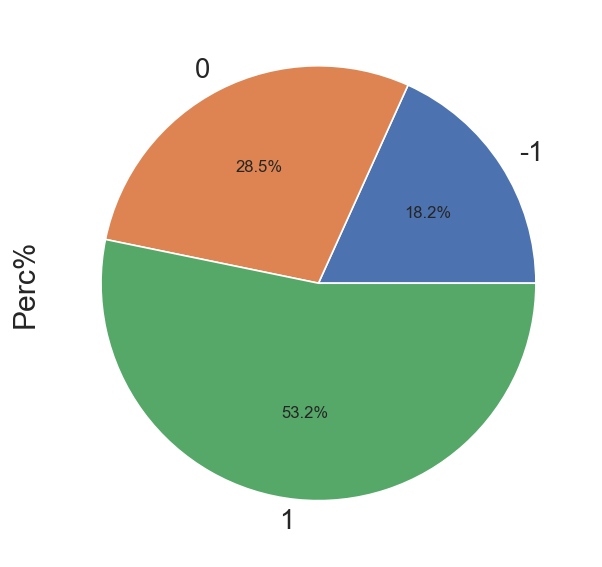

In [148]:

plot = sentiment_dist_10.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [133]:
dominant_topic_us_11 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 0]

dominant_topic_us_11['Perc%'] = 100 * dominant_topic_us_11['Count']/ dominant_topic_us_11['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 0'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_11,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-133-ec52c32c67d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_11['Perc%'] = 100 * dominant_topic_us_11['Count']/ dominant_topic_us_11['Count'].sum()


In [134]:
dominant_topic_us_11.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
834   California            0      1          781    8.885097
6725  New York              0      1          612    6.962457
1668  District of Columbia  0      1          565    6.427759
9025  Texas                 0      1          361    4.106940
833   California            0      0          331    3.765643
6724  New York              0      0          326    3.708760
1667  District of Columbia  0      0          279    3.174061
2772  Illinois              0      1          252    2.866894
4495  Massachusetts         0      1          250    2.844141
1893  Florida               0      1          221    2.514221

In [143]:
sentiment_dist_11 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 0].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_11 = sentiment_dist_11.set_index('Sentiment')



In [144]:
sentiment_dist_11['Perc%'] = 100 * sentiment_dist_11['Count']/ sentiment_dist_11['Count'].sum()

sentiment_dist_11.head()


Topic  Count      Perc%
Sentiment                         
-1         0      808    9.192264 
 0         0      2559   29.112628
 1         0      5423   61.695108

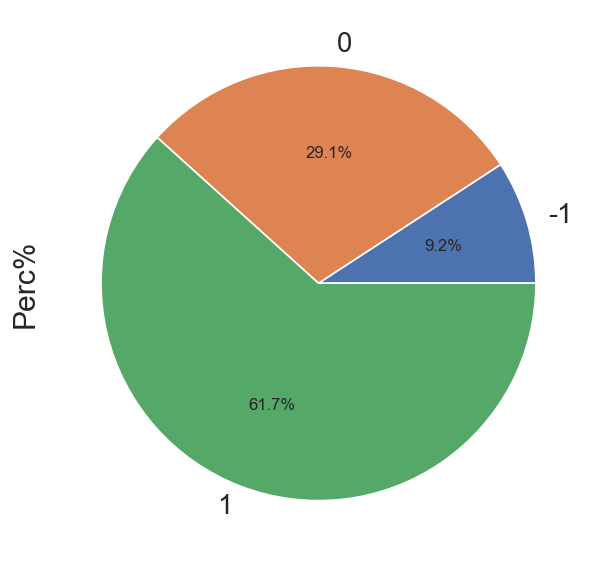

In [145]:

plot = sentiment_dist_11.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [138]:
dominant_topic_us_12 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 19]

dominant_topic_us_12['Perc%'] = 100 * dominant_topic_us_12['Count']/ dominant_topic_us_12['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 19'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_12,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-138-dce5646d64d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_12['Perc%'] = 100 * dominant_topic_us_12['Count']/ dominant_topic_us_12['Count'].sum()


In [139]:
dominant_topic_us_12.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
889   California            19    -1          615    8.074045
6780  New York              19    -1          476    6.249179
9080  Texas                 19    -1          329    4.319286
1948  Florida               19    -1          328    4.306157
891   California            19     1          285    3.741631
6782  New York              19     1          268    3.518446
1723  District of Columbia  19    -1          196    2.573192
2173  Georgia               19    -1          192    2.520677
7994  Pennsylvania          19    -1          162    2.126822
1950  Florida               19     1          158    2.074307

In [140]:
sentiment_dist_12 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 19].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_12 = sentiment_dist_12.set_index('Sentiment')



In [141]:
sentiment_dist_12['Perc%'] = 100 * sentiment_dist_12['Count']/ sentiment_dist_12['Count'].sum()

sentiment_dist_12.head()


Topic  Count      Perc%
Sentiment                         
-1         1377   1467   20.030038
 0         1404   2006   27.389405
 1         1404   3851   52.580557

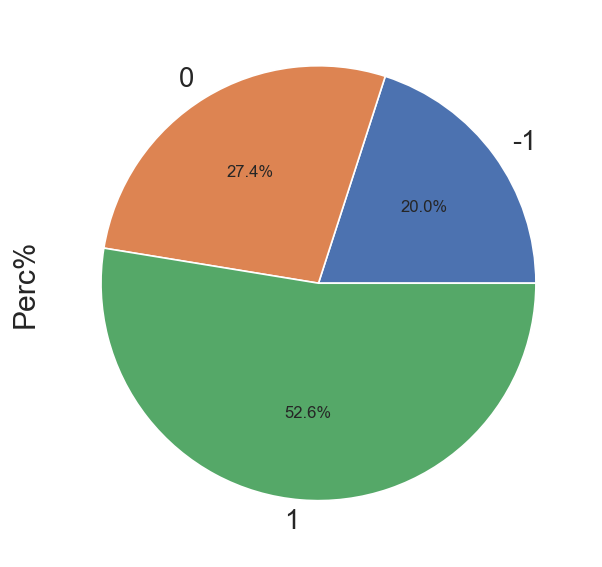

In [142]:

plot = sentiment_dist_12.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [167]:
dominant_topic_us_13 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 44]

dominant_topic_us_13['Perc%'] = 100 * dominant_topic_us_13['Count']/ dominant_topic_us_13['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 44'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_13,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-167-3d051e50462d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_13['Perc%'] = 100 * dominant_topic_us_13['Count']/ dominant_topic_us_13['Count'].sum()


In [88]:
dominant_topic_us_13.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
982   California            36    -1          1275   6.003673
7203  New York              36    -1          1196   5.631681
983   California            36     0          983    4.628714
7204  New York              36     0          912    4.294392
984   California            36     1          842    3.964778
1867  District of Columbia  36    -1          701    3.300843
7205  New York              36     1          674    3.173706
2092  Florida               36    -1          669    3.150162
1868  District of Columbia  36     0          609    2.867637
2318  Georgia               36     0          497    2.340255

In [169]:
sentiment_dist_13 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 44].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_13 = sentiment_dist_13.set_index('Sentiment')



In [170]:
sentiment_dist_13['Perc%'] = 100 * sentiment_dist_13['Count']/ sentiment_dist_13['Count'].sum()

sentiment_dist_13.head()


Topic  Count      Perc%
Sentiment                         
-1         2244   1325   19.133574
 0         2200   3004   43.379061
 1         2200   2596   37.487365

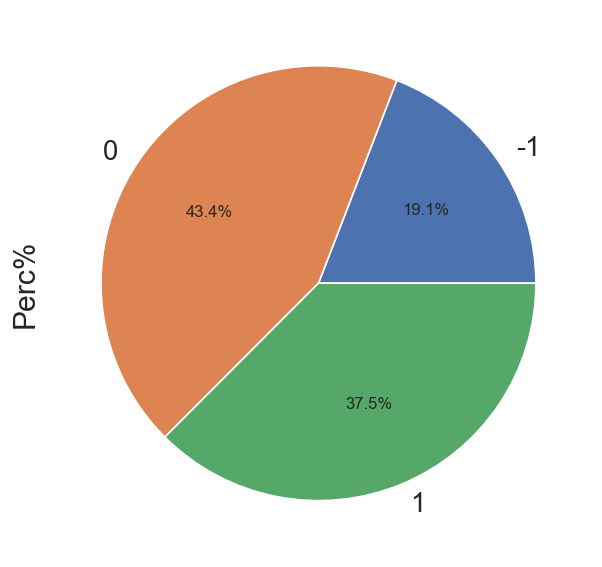

In [171]:

plot = sentiment_dist_13.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [172]:
dominant_topic_us_14 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 70]

dominant_topic_us_14['Perc%'] = 100 * dominant_topic_us_14['Count']/ dominant_topic_us_14['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 70'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_14,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-172-05ad46de6dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_14['Perc%'] = 100 * dominant_topic_us_14['Count']/ dominant_topic_us_14['Count'].sum()


In [173]:
dominant_topic_us_14.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1042  California            70    -1          235    6.983655
1043  California            70     0          170    5.052006
6933  New York              70    -1          160    4.754829
1876  District of Columbia  70    -1          157    4.665676
1877  District of Columbia  70     0          123    3.655275
6934  New York              70     0          122    3.625557
2101  Florida               70    -1          111    3.298663
1044  California            70     1          108    3.209510
9233  Texas                 70    -1          99     2.942051
609   Arizona               70    -1          95     2.823180

In [174]:
sentiment_dist_14 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 70].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_14.set_index('Sentiment')




In [175]:
sentiment_dist_14['Perc%'] = 100 * sentiment_dist_14['Count']/ sentiment_dist_14['Count'].sum()

sentiment_dist_14.head()

Topic  Count      Perc%
Sentiment                         
-1         3500   1502   44.635958
 0         3290   1068   31.738484
 1         3500   795    23.625557

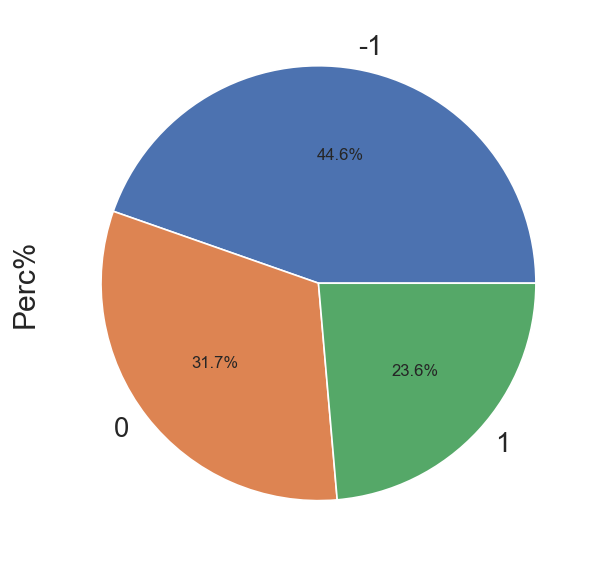

In [176]:

plot = sentiment_dist_14.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [177]:
dominant_topic_us_15 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 60]

dominant_topic_us_15['Perc%'] = 100 * dominant_topic_us_15['Count']/ dominant_topic_us_15['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 60'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_15,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-177-98c95e8cab27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_15['Perc%'] = 100 * dominant_topic_us_15['Count']/ dominant_topic_us_15['Count'].sum()


In [178]:
dominant_topic_us_15.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1846  District of Columbia  60    -1          426    6.559901
6903  New York              60    -1          394    6.067139
1012  California            60    -1          364    5.605174
1014  California            60     1          337    5.189406
1848  District of Columbia  60     1          313    4.819834
6905  New York              60     1          288    4.434863
1847  District of Columbia  60     0          260    4.003696
1013  California            60     0          216    3.326147
9203  Texas                 60    -1          186    2.864182
6904  New York              60     0          170    2.617801

In [180]:
sentiment_dist_15 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 60].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_15 = sentiment_dist_16.set_index('Sentiment')


In [181]:
sentiment_dist_15['Perc%'] = 100 * sentiment_dist_15['Count']/ sentiment_dist_15['Count'].sum()

sentiment_dist_15.head()


Topic  Count      Perc%
Sentiment                         
-1         3060   2781   42.824145
 0         2700   1470   22.636280
 1         2940   2243   34.539575

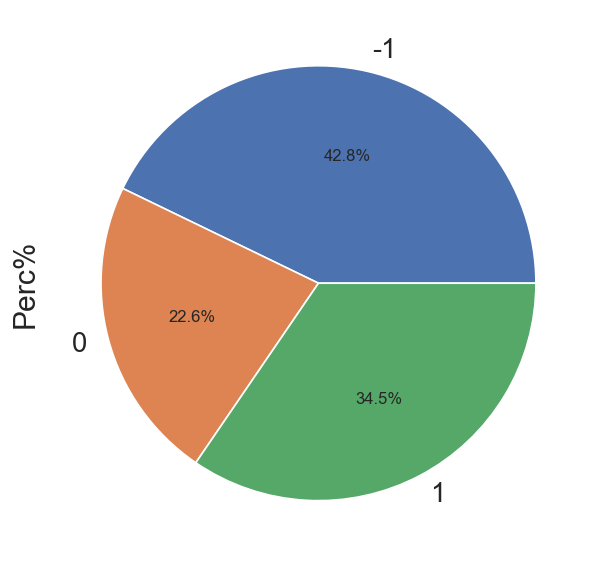

In [182]:

plot = sentiment_dist_15.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [183]:
dominant_topic_us_16 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 27]

dominant_topic_us_16['Perc%'] = 100 * dominant_topic_us_16['Count']/ dominant_topic_us_16['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 27'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_16,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-183-1c664987c9dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_16['Perc%'] = 100 * dominant_topic_us_16['Count']/ dominant_topic_us_16['Count'].sum()


In [184]:
dominant_topic_us_16.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
915   California            27     1          659    8.997815
1749  District of Columbia  27     1          376    5.133807
6806  New York              27     1          370    5.051884
914   California            27     0          292    3.986892
9106  Texas                 27     1          257    3.509011
913   California            27    -1          241    3.290552
6805  New York              27     0          210    2.867286
1748  District of Columbia  27     0          197    2.689787
1974  Florida               27     1          188    2.566903
6804  New York              27    -1          166    2.266521

In [185]:
sentiment_dist_16 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 27].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_16 = sentiment_dist_16.set_index('Sentiment')



In [186]:
sentiment_dist_16['Perc%'] = 100 * sentiment_dist_16['Count']/ sentiment_dist_16['Count'].sum()

sentiment_dist_16.head()


Topic  Count      Perc%
Sentiment                         
-1         1377   1467   20.030038
 0         1404   2006   27.389405
 1         1404   3851   52.580557

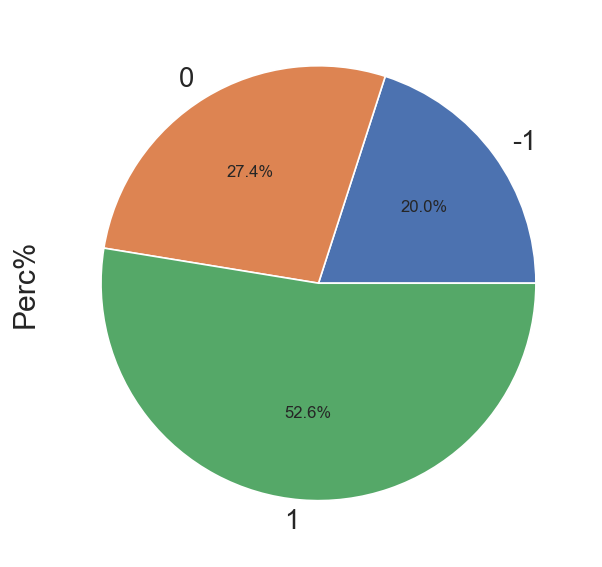

In [187]:

plot = sentiment_dist_16.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [188]:
dominant_topic_us_17 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 50]

dominant_topic_us_17['Perc%'] = 100 * dominant_topic_us_17['Count']/ dominant_topic_us_17['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 50'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_17,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-188-5be4d30b8ae9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_17['Perc%'] = 100 * dominant_topic_us_17['Count']/ dominant_topic_us_17['Count'].sum()


In [189]:
dominant_topic_us_17.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
982    California            50    -1          616    6.899642
10417  Wisconsin             50     0          567    6.350806
6873   New York              50    -1          457    5.118728
983    California            50     0          422    4.726703
984    California            50     1          334    3.741039
6874   New York              50     0          315    3.528226
1816   District of Columbia  50    -1          312    3.494624
2041   Florida               50    -1          298    3.337814
9173   Texas                 50    -1          264    2.956989
6875   New York              50     1          252    2.822581

In [190]:
sentiment_dist_17 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 50].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_17 = sentiment_dist_2.set_index('Sentiment')


In [191]:
sentiment_dist_17['Perc%'] = 100 * sentiment_dist_17['Count']/ sentiment_dist_17['Count'].sum()

sentiment_dist_17.head()


Topic  Count      Perc%
Sentiment                         
-1         2500   3637   40.737007
 0         2550   3118   34.923835
 1         2550   2173   24.339158

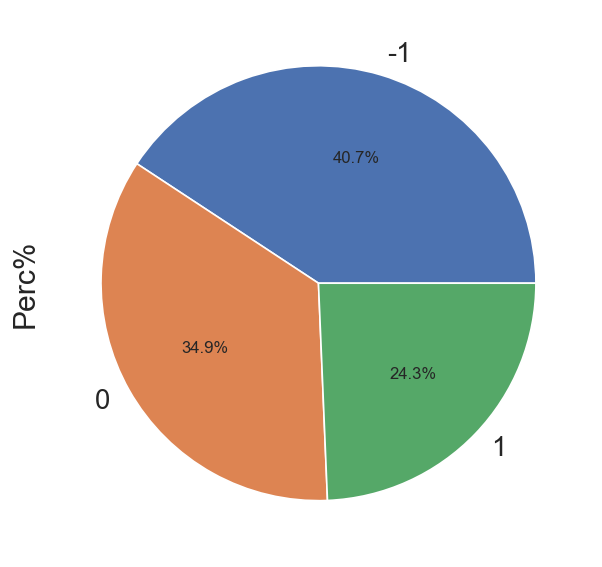

In [192]:

plot = sentiment_dist_17.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [193]:
dominant_topic_us_18 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 7]

dominant_topic_us_18['Perc%'] = 100 * dominant_topic_us_18['Count']/ dominant_topic_us_18['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 7'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_18,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-193-1ed69370729d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_18['Perc%'] = 100 * dominant_topic_us_18['Count']/ dominant_topic_us_18['Count'].sum()


In [194]:
dominant_topic_us_18.sort_values(by=['Count'], ascending=False).head(10)
# sentiment_dist_3 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 67].groupby(["Sentiment"]).agg('sum')
# # sentiment_dist_3 = sentiment_dist_2.set_index('Sentiment')


# sentiment_dist_3['Perc%'] = 100 * sentiment_dist_3['Count']/ sentiment_dist_3['Count'].sum()

# sentiment_dist_3.head()


# plot = sentiment_dist_3.plot.pie(y='Perc%',figsize=(11, 6))

State  Topic  Sentiment  Count      Perc%
854   California  7      0          1009   10.357216
855   California  7      1          708    7.267502 
853   California  7     -1          466    4.783412 
6745  New York    7      0          424    4.352289 
1913  Florida     7      0          419    4.300965 
1914  Florida     7      1          323    3.315541 
9046  Texas       7      1          288    2.956272 
6746  New York    7      1          269    2.761240 
9045  Texas       7      0          259    2.658592 
2792  Illinois    7      0          232    2.381441

In [195]:
sentiment_dist_18 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 7].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_18.set_index('Sentiment')


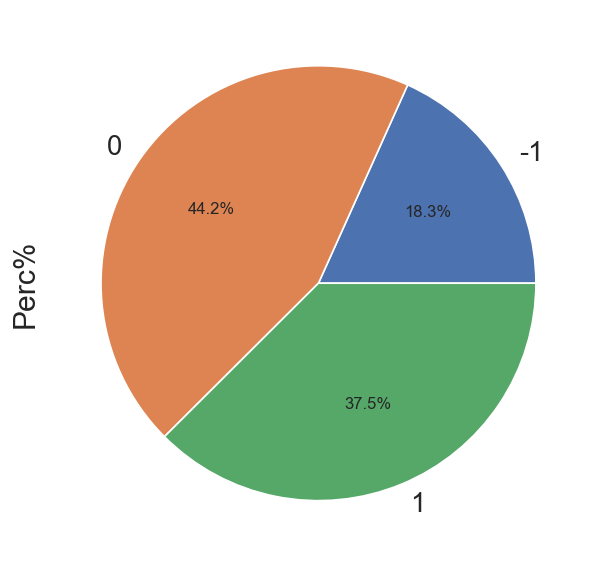

In [196]:
sentiment_dist_18['Perc%'] = 100 * sentiment_dist_18['Count']/ sentiment_dist_18['Count'].sum()

plot = sentiment_dist_18.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [197]:
dominant_topic_us_19 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 73]

dominant_topic_us_19['Perc%'] = 100 * dominant_topic_us_19['Count']/ dominant_topic_us_19['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 73'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_19,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-197-7e4e9ce36e1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_19['Perc%'] = 100 * dominant_topic_us_19['Count']/ dominant_topic_us_19['Count'].sum()


In [198]:
dominant_topic_us_19.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1051  California            73    -1          513    9.236586
6942  New York              73    -1          406    7.310047
1885  District of Columbia  73    -1          378    6.805906
1052  California            73     0          272    4.897371
2335  Georgia               73    -1          270    4.861361
6944  New York              73     1          187    3.366943
1053  California            73     1          185    3.330933
6943  New York              73     0          183    3.294923
1886  District of Columbia  73     0          176    3.168887
9242  Texas                 73    -1          170    3.060857

In [199]:
sentiment_dist_19 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 73].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_19 = sentiment_dist_19.set_index('Sentiment')



In [200]:
sentiment_dist_19['Perc%'] = 100 * sentiment_dist_19['Count']/ sentiment_dist_19['Count'].sum()

sentiment_dist_19.head()



Topic  Count      Perc%
Sentiment                         
-1         3577   2979   53.637018
 0         3650   1285   23.136478
 1         3577   1290   23.226503

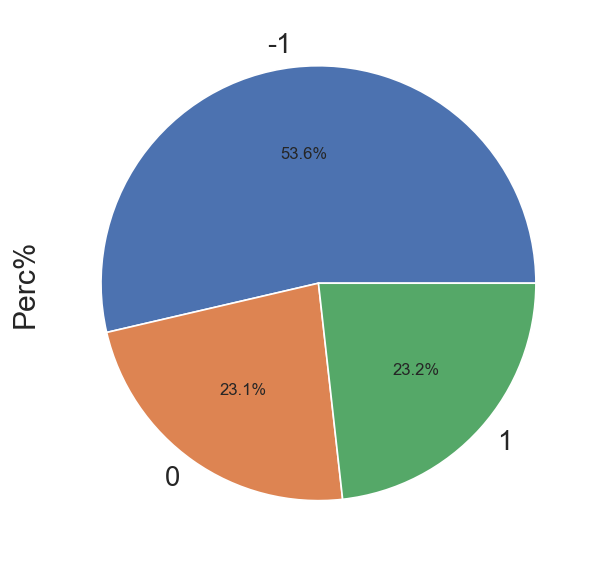

In [201]:
plot = sentiment_dist_19.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [202]:
dominant_topic_us_20 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 9]

dominant_topic_us_20['Perc%'] = 100 * dominant_topic_us_20['Count']/ dominant_topic_us_20['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 9'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_20,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-202-f4c6ae5547fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_20['Perc%'] = 100 * dominant_topic_us_20['Count']/ dominant_topic_us_20['Count'].sum()


In [203]:
dominant_topic_us_20.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
861   California            9      1          540    7.036747
860   California            9      0          398    5.186343
6752  New York              9      1          379    4.938754
1694  District of Columbia  9      0          359    4.678134
1695  District of Columbia  9      1          357    4.652072
859   California            9     -1          284    3.700808
6751  New York              9      0          259    3.375033
1693  District of Columbia  9     -1          225    2.931978
9052  Texas                 9      1          224    2.918947
4747  Michigan              9      1          209    2.723482

In [204]:
sentiment_dist_20 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 17].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_20 = sentiment_dist_20.set_index('Sentiment')



In [205]:
sentiment_dist_20['Perc%'] = 100 * sentiment_dist_20['Count']/ sentiment_dist_20['Count'].sum()

sentiment_dist_20.head()


Topic  Count      Perc%
Sentiment                         
-1         731    464    33.237822
 0         816    496    35.530086
 1         765    436    31.232092

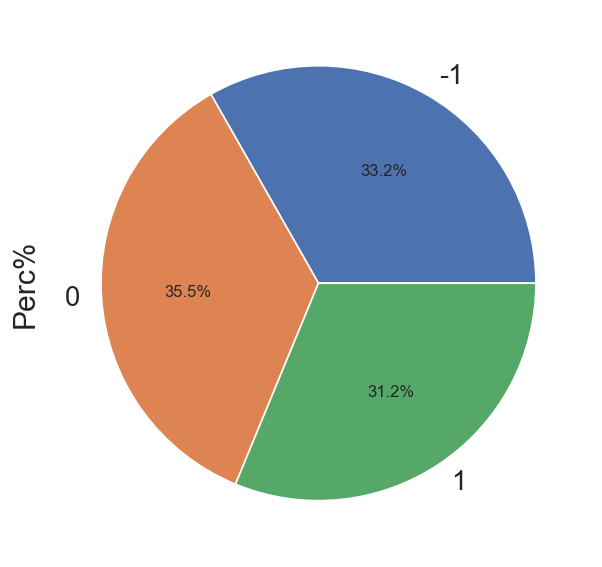

In [206]:
plot = sentiment_dist_20.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))